In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.datasets import cifar10

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step


In [3]:
selected_classes = [3, 5]
train_filter = np.isin(y_train, selected_classes)
test_filter = np.isin(y_test, selected_classes)

In [4]:
X_train_filtered = X_train[train_filter.flatten()]
y_train_filtered = y_train[train_filter].flatten()

In [5]:
X_test_filtered = X_test[test_filter.flatten()]
y_test_filtered = y_test[test_filter].flatten()

In [6]:
y_train_binary = np.where(y_train_filtered == 3, 0, 1)
y_test_binary = np.where(y_test_filtered == 3, 0, 1)

In [7]:
X_train_flat = X_train_filtered.reshape(len(X_train_filtered), -1)
X_test_flat = X_test_filtered.reshape(len(X_test_filtered), -1)

In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_flat)
X_test_scaled = scaler.transform(X_test_flat)

In [9]:
pca = PCA(n_components=100)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [10]:
svm = SVC(kernel='linear', C=1.0)
svm.fit(X_train_pca, y_train_binary)

SVC(kernel='linear')

In [11]:
y_pred = svm.predict(X_test_pca)

In [12]:
print("Accuracy:", accuracy_score(y_test_binary, y_pred))
print("\nClassification Report:\n", classification_report(y_test_binary, y_pred, target_names=['Cat', 'Dog']))
print("Confusion Matrix:\n", confusion_matrix(y_test_binary, y_pred))

Accuracy: 0.6125

Classification Report:
               precision    recall  f1-score   support

         Cat       0.61      0.62      0.62      1000
         Dog       0.61      0.60      0.61      1000

    accuracy                           0.61      2000
   macro avg       0.61      0.61      0.61      2000
weighted avg       0.61      0.61      0.61      2000

Confusion Matrix:
 [[620 380]
 [395 605]]


In [13]:
label_map = {0: 'Cat', 1: 'Dog'}
n_samples = 10

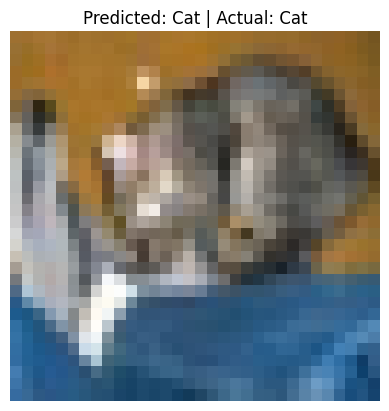

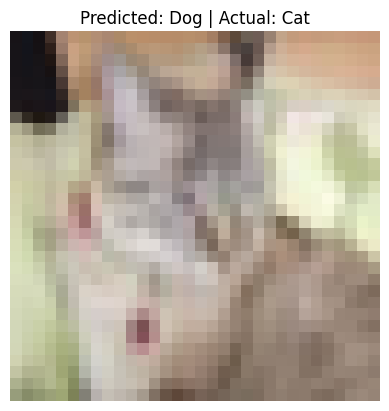

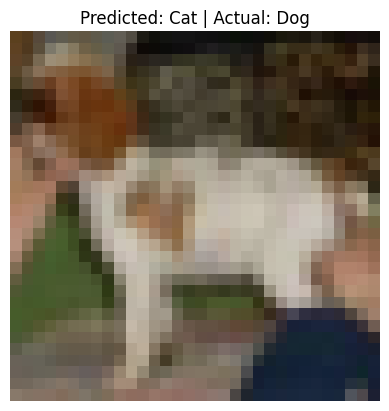

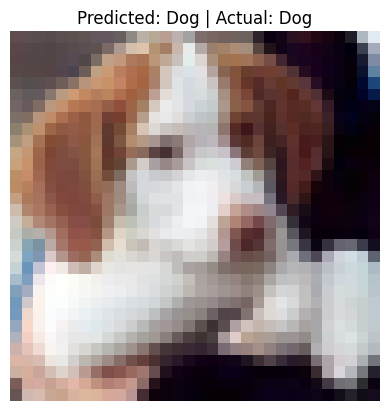

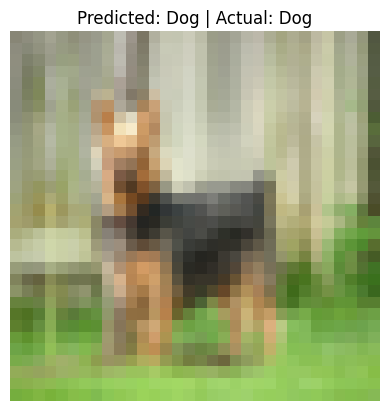

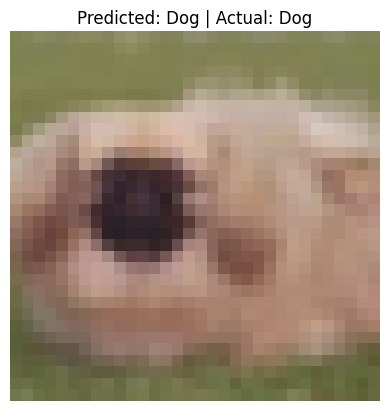

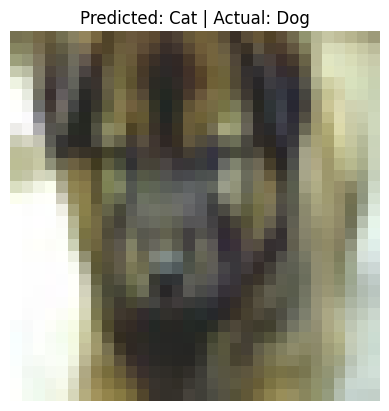

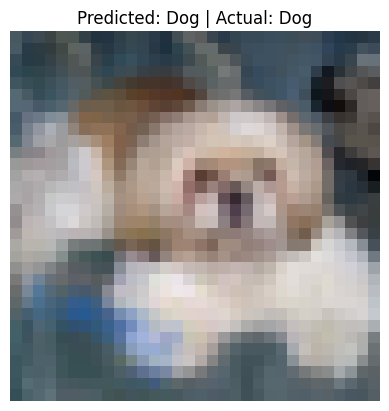

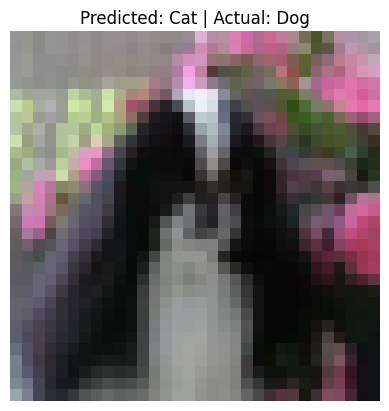

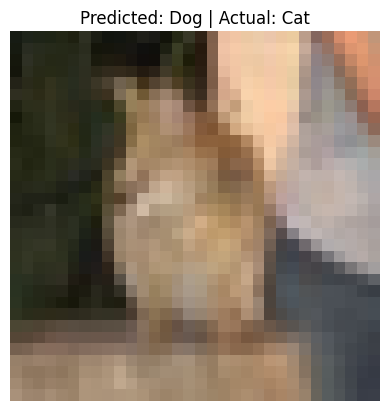

In [14]:
for i in range(n_samples):
    plt.imshow(X_test_filtered[i])
    plt.title(f"Predicted: {label_map[y_pred[i]]} | Actual: {label_map[y_test_binary[i]]}")
    plt.axis('off')
    plt.show()